In [1]:
import pandas as pd
import prepare

import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams.update({'font.size': 16})

import warnings
warnings.filterwarnings("ignore")

# Set alpha significance level to 0.05
alpha = 0.05

# Superstore Time Series Project: Where should we go with our product strategy?

### The goal of this project was to come up with recommendations for the VP of Product related to the following questions:
- Which product line should we expand?
- Is there a product category that is particularly profitable?
- Does one or anther stand out in terms of sales volume?
- How do these relationships change if we control for customer segment?

## Acquiring and Preparing the data from the superstore_db, which is stored on the cloud server.
- SUMMARIZE ACQUIRE AND PREPARE STEPS

In [2]:
df = prepare.prepare_superstore_data()

Reading csv file..


## Exploration Results

### Data contains sales and profit information for 3 categories of products

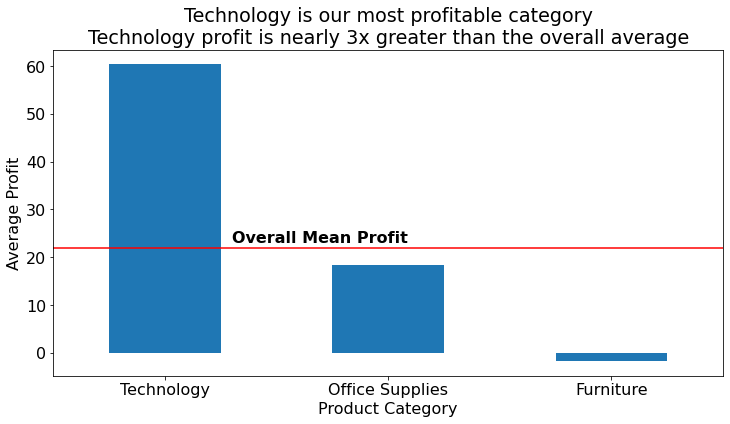

In [63]:
df.groupby("category").profit.mean().sort_values(ascending=False).plot.bar()
plt.title('Technology is our most profitable category\nTechnology profit is nearly 3x greater than the overall average')
plt.axhline(df.profit.mean(), color = 'r')
plt.annotate('Overall Mean Profit', xy=(0.3,23), fontweight='bold')
plt.xticks(rotation=0)
plt.xlabel("Product Category")
plt.ylabel("Average Profit")
plt.show()

In [16]:
for cat in df["category"].unique():
    overall_mean = df.profit.mean()
    print(overall_mean)
    sample = df[df["category"] == cat].profit
    t,p = stats.ttest_1samp(sample, overall_mean)
    print(cat, "samples: ",len(sample), "t:", round(t,2), "p", round(p,4), "cat mean",round(sample.mean(),2))
    if (t>0)&(p/2<alpha):
        print("Significant Higher ", cat)
    if (t<0)&(p/2<alpha):
        print("Significant Lower ", cat)

21.88035138408307
Furniture samples:  360 t: -2.74 p 0.0065 cat mean -1.73
Significant Lower  Furniture
21.88035138408307
Office Supplies samples:  1055 t: -0.82 p 0.4133 cat mean 18.31
21.88035138408307
Technology samples:  319 t: 1.94 p 0.0531 cat mean 60.35
Significant Higher  Technology


### Technology is significantly more profitable than the overall average and is the only category more profitable than average

### Taking a look at subcategories

Text(1, 200, 'Copiers and Accessories are the big winners')

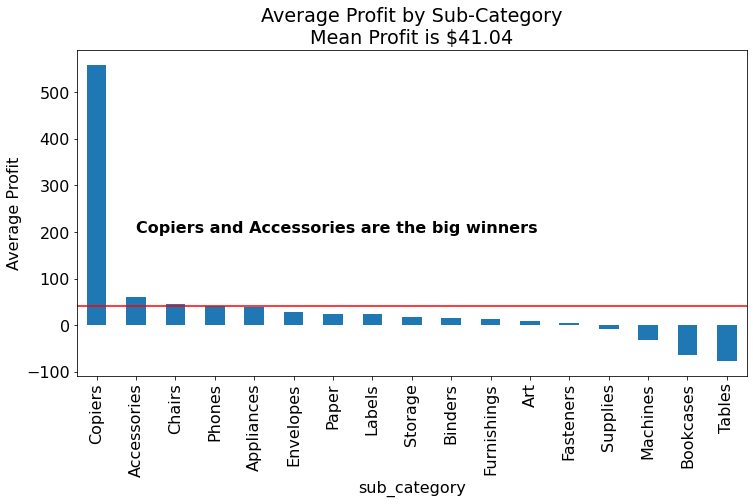

In [104]:
mean_profit = df.groupby("sub_category").profit.mean().mean()
df.groupby("sub_category").profit.mean().sort_values(ascending=False).plot.bar()
plt.title(f'Average Profit by Sub-Category\nMean Profit is ${mean_profit:.2f}')
plt.ylabel('Average Profit')
plt.axhline(mean_profit, color='r')
plt.annotate('Copiers and Accessories are the big winners', xy=(1,200), fontweight='bold')

### Copies and accessories, both members of the technology category, show significantly greater profitability than the overall average

### To help focus our marketing efforts - do any customer segments show greater profitability by category?

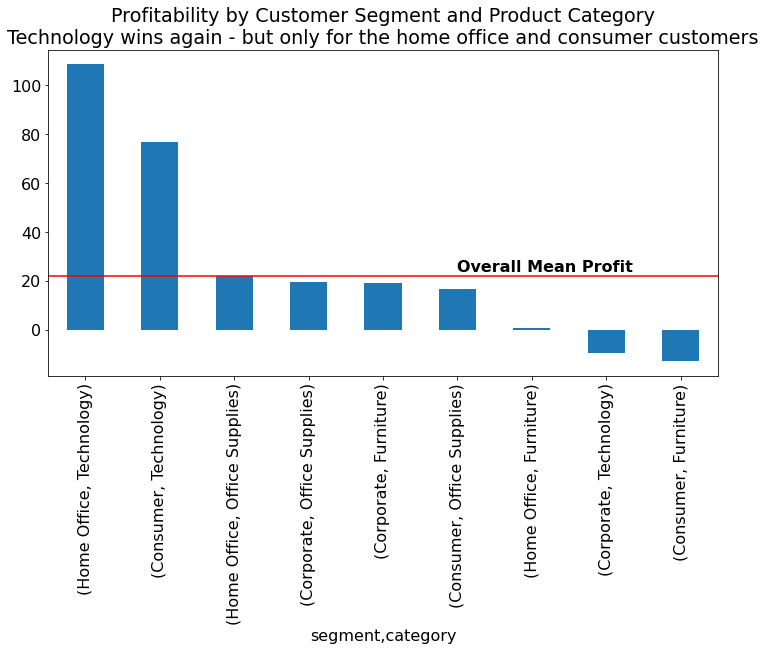

In [77]:
profit_by_seg_cat = df.groupby(["segment","category"]).profit.mean().sort_values(ascending=False)
profit_by_seg_cat.plot.bar()
plt.axhline(df.profit.mean(), color = 'r')
plt.annotate('Overall Mean Profit', xy=(5,24), fontweight='bold')
plt.title("Profitability by Customer Segment and Product Category\nTechnology wins again - but only for the home office and consumer customers")
plt.show()

In [30]:
overall_mean_profit = df.profit.mean()
for seg in df["segment"].unique():
    for cat in df.category.unique():
        sample = df[(df.segment == seg)&(df.category == cat)].profit
        if len(sample) >30:
            t,p = stats.ttest_1samp(sample, overall_mean_profit)
            used = 'ttest'
        else:
            t,p = stats.wilcoxon(sample)
            used = 'wilcoxon'
        if (t>0)&(p/2<alpha):
            print("Significantly Higher ", seg, cat, used)
        if (t<0)&(p/2<alpha):
            print("Significantly Lower ", seg, cat, used)

Significantly Lower  Consumer Furniture ttest
Significantly Higher  Consumer Technology ttest
Significantly Higher  Home Office Technology ttest


### Statistical testing confirms Home Office and Consumer customers with Technology product category is significantly more profitable than the overall average

### How do the categories compare in terms of sales volume (quantity)?

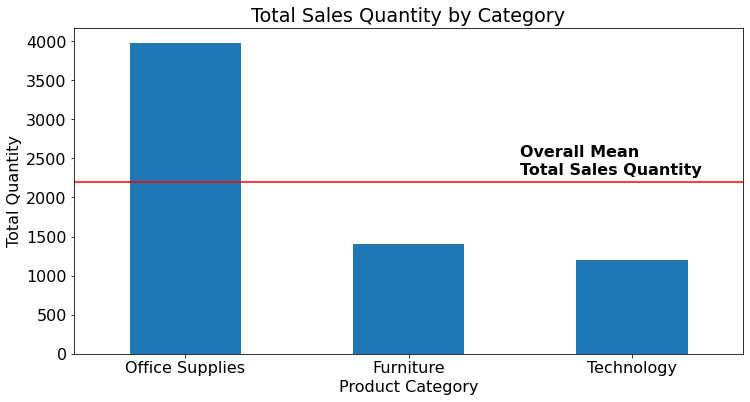

In [64]:
df.groupby("category").quantity.sum().sort_values(ascending=False).plot.bar()
plt.title('Total Sales Quantity by Category')
plt.axhline(df.groupby("category").quantity.sum().mean(), color = 'r')
plt.annotate('Overall Mean \nTotal Sales Quantity', xy=(1.5,2300), fontweight='bold')
plt.xticks(rotation=0)
plt.xlabel("Product Category")
plt.ylabel("Total Quantity")
plt.show()

### We do the least volume in Technology, but this is our most profitable category!

In [94]:
profit_by_seg_cat.head(2)

clrs=['green' if (x in profit_by_seg_cat.head(4).index) else '#1f77b4' for x in df.groupby(["segment","category"]).quantity.sum().index]

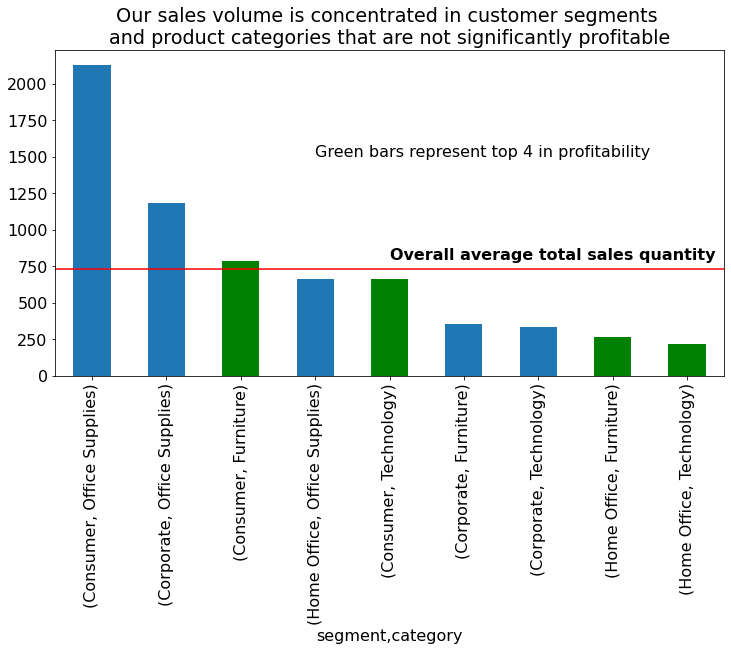

In [105]:
df.groupby(["segment","category"]).quantity.sum().sort_values(ascending=False).plot.bar(color=clrs)
plt.axhline(df.groupby(["segment","category"]).quantity.sum().mean(), color = 'r')
plt.title("Our sales volume is concentrated in customer segments \nand product categories that are not significantly profitable")
plt.annotate("Green bars represent top 4 in profitability", xy=(3, 1500))
plt.annotate("Overall average total sales quantity",xy=(4,800), fontweight='bold')
plt.show()